In [2]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import datetime
SRdir='/Users/jracusin/Fermi/Senior_Review/SR2019/'

In [3]:
def mjd2year(mjd):
    t=Time(mjd,format='mjd',out_subfmt='date')
    year=[float(t.yday[i][0:4])+float(t.yday[i][5:8])/365. for i in range(len(mjd))]
    return np.array(year)

In [4]:
def read_bib(dir=SRdir):
    file='fermi_bibcodes3.csv'
    bib0=ascii.read(dir+file)
    print bib0.keys()
    date=np.array(bib0['Date Published'])
    author=np.array(bib0['Author'])
    category=np.array(bib0['Category'])
    d=np.array(np.zeros(len(date)))
    c=np.array(bib0['No. of Citations'])
    year=np.zeros(len(date))
    month=np.zeros(len(date))
    
    for i in range(len(date)):
        if len(date[i])==8: 
            year[i]=float(date[i][4:8])
            month[i]=float(datetime.datetime.strptime(date[i][0:3], '%b').month)
            d[i]=year[i]+month[i]/12.

    w=np.where(d>=2008.)[0]
    d=d[w]
    year=year[w]
    month=month[w]
    author=author[w]
    category=category[w]
    citations=c[w]
    return d,year,month,author,category,citations


In [5]:
date,year,month,author,category,citations=read_bib()

['Title', 'Author', 'Date Published', 'Bibcode', 'No. of Citations', 'Category', 'Subjects']


In [6]:
print np.unique(category)
print np.linspace(2008,2019,12)
print len(citations),len(year),len(author)

['0' 'Cannot be classified' 'Instrumentation software or operations'
 'Predicts Fermi results' 'Presents analysis of Fermi data'
 'Refers to published Fermi results']
[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]
3254 3254 3254


In [7]:
corr=1./(max(date)-max(year))

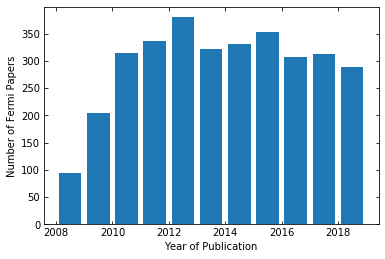

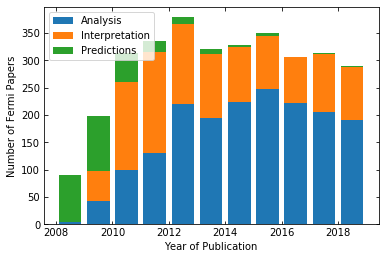

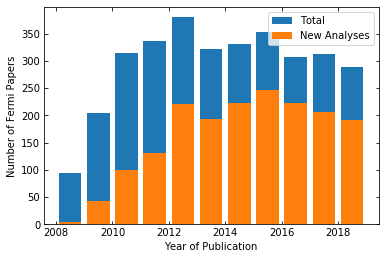

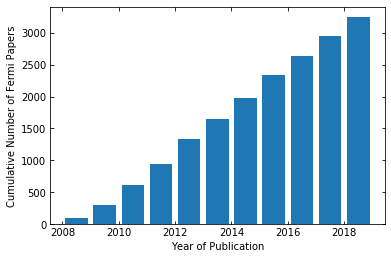

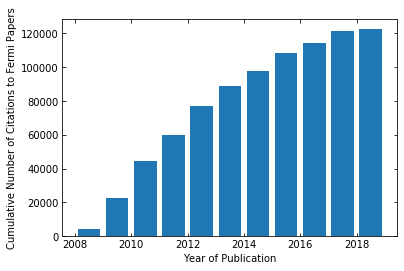

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[0, 0, 74, 146, 194, 234, 250, 199, 207, 198, 177, 181, 169]


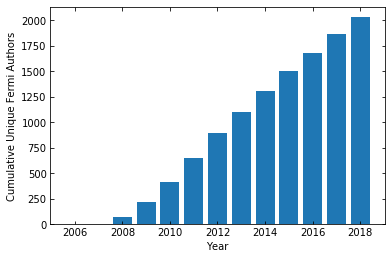

In [8]:
plot.figure()
ax=plot.axes()
h=np.histogram(year,bins=np.linspace(2008,2019,12))
#h[0][-1]=h[0][-1]*corr
plot.bar(h[1][:-1]+0.5,h[0])
plot.xlabel('Year of Publication')
plot.ylabel('Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'Fermi_publications.pdf',bbox_inches='tight')
plot.show()

plot.figure()
ax=plot.axes()
w1=np.where(category == 'Presents analysis of Fermi data')
w2=np.where(category == 'Refers to published Fermi results')
w3=np.where(category == 'Predicts Fermi results')
h1=np.histogram(year[w1],bins=np.linspace(2008,2019,12))
h2=np.histogram(year[w2],bins=np.linspace(2008,2019,12))
h3=np.histogram(year[w3],bins=np.linspace(2008,2019,12))
#h[0][-1]=h[0][-1]*corr
plot.bar(h1[1][:-1]+0.5,h1[0],label='Analysis')
plot.bar(h2[1][:-1]+0.5,h2[0],bottom=h1[0],label='Interpretation')
plot.bar(h3[1][:-1]+0.5,h3[0],bottom=h1[0]+h2[0],label='Predictions')
plot.legend()
plot.xlabel('Year of Publication')
plot.ylabel('Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'Fermi_publications_split.pdf',bbox_inches='tight')
plot.show()

plot.figure()
ax=plot.axes()
#w1=np.where(category == 'Presents analysis of Fermi data')
h=np.histogram(year,bins=np.linspace(2008,2019,12))
#h1=np.histogram(year[w1],bins=np.linspace(2005.5,2018.5,14))
#h[0][-1]=h[0][-1]*corr
plot.bar(h[1][:-1]+0.5,h[0],label='Total')
plot.bar(h1[1][:-1]+0.5,h1[0],label='New Analyses')
plot.legend()
plot.xlabel('Year of Publication')
plot.ylabel('Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'Fermi_publications_new_analyses.pdf',bbox_inches='tight')
plot.show()

plot.figure()
s=np.argsort(date)
ax=plot.axes()
plot.bar(h[1][:-1]+0.5,np.cumsum(h[0]))
#plot.bar(year[s],np.cumsum(np.ones(len(year[s]))))
plot.xlabel('Year of Publication')
plot.ylabel('Cumulative Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

plot.figure()
n=[]
yy=np.array(range(2008,2019))
for y in yy:
    w=np.where(year == y)[0]
    n.append(np.sum(citations[w]))
ax=plot.axes()
plot.bar(yy+0.5,np.cumsum(n))
plot.xlabel('Year of Publication')
plot.ylabel('Cumulative Number of Citations to Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

### this can't be right, not list of authors, just first author
u,ind=np.unique(author,return_index=True)
print range(2006,2019)
n=[len(np.where((date[ind]>i) & (date[ind]<(i+1)))[0]) for i in range(2006,2019)]
print n
plot.figure()
ax=plot.axes()
plot.bar(range(2006,2019),np.cumsum(n))
plot.xlabel('Year')
plot.ylabel('Cumulative Unique Fermi Authors')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018] [4384, 18395, 21782, 15575, 16815, 11894, 9052, 10485, 6075, 6981, 1014]


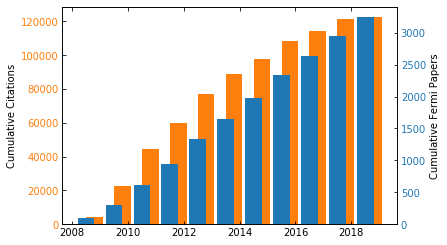

In [9]:
fig, ax1 = plot.subplots()
n=[]
yy=np.array(range(2008,2019))
for y in yy:
    w=np.where(year == y)[0]
    n.append(np.sum(citations[w]))
ax2 = ax1.twinx()
print yy,n
#plot.figure()
s=np.argsort(date)
#ax=plot.axes()
h=np.histogram(year,bins=np.linspace(2008,2019,12))
ax2.bar(h[1][:-1]+0.5,np.cumsum(h[0]),label='Papers',width=0.6)
ax1.bar(yy+0.8,np.cumsum(n),color='C1',label='Citations',width=0.6)
#plot.bar(year[s],np.cumsum(np.ones(len(year[s]))))
plot.xlabel('Year of Publication')
ax2.set_ylabel('Cumulative Fermi Papers')
ax1.set_ylabel('Cumulative Citations')
ax1.tick_params(axis='y', labelcolor='C1')
ax2.tick_params(axis='y', labelcolor='C0')
# ax1.yaxis.set_label_position("right")
# ax2.yaxis.set_label_position("left")
ax1.tick_params(direction='in',axis='both',which='both',right=False,top=True)
ax2.tick_params(direction='in',axis='both',which='both',right=True)
plot.savefig(SRdir+'Fermi_papers_citations.pdf',bbox_inches='tight')
plot.show()

In [10]:
print len(citations),len(year),max(date)

3254 3254 2019.0


In [11]:
def lam2energy(wavelength):
    h=4.135667662e-15 #ev*s
    c=3e10 #cm/s
    energy=h*c/wavelength
    return energy
def freq2energy(freq):
    h=4.135667662e-15 #ev*s
    energy=h*freq
    return energy

In [33]:
### MW/MM plot - ugh
minyear=2016
maxyear=2025
sryear=2020
fs=11
sc='C0'
pc='C2'
mm=Table(rows=[\
            ('',minyear,maxyear,maxyear,freq2energy(0.58e9),freq2energy(14.5e9),sc,sc,fs,'white',False),#ALMA
            ('',minyear,maxyear,maxyear,freq2energy(30e6),freq2energy(240e6),sc,sc,fs,'white',False),#LOFAR/MWA
            ('',minyear,maxyear,maxyear,freq2energy(1e9),freq2energy(50e9),pc,pc,fs,'white',False),#ATCA/JVLA
            ('',minyear,maxyear,maxyear,freq2energy(70e6),freq2energy(3e9),pc,pc,fs,'white',False),#Arecibo/FAST
            ('SKA',2021,maxyear,maxyear,freq2energy(350e6),freq2energy(4e9),sc,sc,fs,'white',True),#SKA Prototypes
            ('JWST',2021.25,maxyear,maxyear,lam2energy(0.6e-4),lam2energy(28e-4),pc,pc,fs,'white',True),
            ('',minyear,maxyear,maxyear,0.1e12,1e14,sc,sc,fs,'white',False), #HAWC
            ('',minyear,maxyear,maxyear,lam2energy(0.4e-4),lam2energy(1.2e-4),sc,sc,fs,'white',True),#Optical Telescopes (Survey/Pointing)
            ('LSST',2023,maxyear,maxyear,lam2energy(0.3e-4),lam2energy(1e-4),sc,sc,fs,'white',True),
            ('',minyear,sryear,maxyear,0.3e3,10e3,pc,pc,fs,'white',False),#Chandra/XMM/Swift-XRT/NICER
            ('',minyear,sryear,maxyear,3e3,80e3,pc,pc,fs,'white',False),#NuSTAR
            ('',minyear,sryear,maxyear,15e3,150e3,sc,sc,fs,'white',False),#Swift-BAT
            ('',minyear,maxyear,maxyear,0.03e12,30e12,pc,pc,fs,'white',False), #VERITAS/MAGIC/HESS
            ('CTA',2020,maxyear,maxyear,50e9,1e14,pc,pc,fs,'white',True),
            ('ANTARES',minyear,maxyear,maxyear,1e16,1e17,'lightgrey','lightgrey',fs,'black',False),
            ('IceCube',minyear,maxyear,maxyear,1e17,1e18,'lightgrey','lightgrey',fs,'black',False),
            ('',minyear,2016.1,2016.1,1e19,1e20,'darkgrey','darkgrey',fs,'black',False), #O1
            ('',2016.9,2017.6,2017.6,1e19,1e20,'darkgrey','darkgrey',fs,'black',False),#O2
            ('',2019.3,2020.5,2020.5,1e19,1e20,'darkgrey','darkgrey',fs,'black',False),#O3
            ('LIGO/Virgo',2021.3,2024.,2025.,1e19,1e20,'darkgrey','darkgrey',fs,'black',True),#design
            ('Pulsar Timing Arrays',minyear,maxyear,maxyear,1e20,1e21,'darkgrey','darkgrey',fs,'black',False),
            ('Auger/Telescope Array',minyear,maxyear,maxyear,1e22,1e23,'grey','grey',fs,'black',False),
            ('AMS-02',minyear,maxyear,maxyear,1e23,1e24,'grey','grey',fs,'black',False),
            ('Dampe',minyear,maxyear,maxyear,1e24,1e25,'grey','grey',fs,'black',False),
            ('CALET',minyear,maxyear,maxyear,1e25,1e26,'grey','grey',fs,'black',False),
            ('Fermi',minyear,2020,2025,8e3,300e9,'tomato','tomato',20,'black',True)],\
        names=('Mission','StartYear','StopYear','ExtendedYear','EnergyLow','EnergyHigh','color','ecolor','fontsize','fontcolor','bold'))
## create object or table with mission name, year, extended years, color, energy range, 
print mm

       Mission        StartYear StopYear ... fontsize fontcolor  bold
--------------------- --------- -------- ... -------- --------- -----
                         2016.0   2025.0 ...       11     white False
                         2016.0   2025.0 ...       11     white False
                         2016.0   2025.0 ...       11     white False
                         2016.0   2025.0 ...       11     white False
                  SKA    2021.0   2025.0 ...       11     white  True
                 JWST   2021.25   2025.0 ...       11     white  True
                         2016.0   2025.0 ...       11     white False
                         2016.0   2025.0 ...       11     white  True
                 LSST    2023.0   2025.0 ...       11     white  True
                         2016.0   2020.0 ...       11     white False
                  ...       ...      ... ...      ...       ...   ...
              IceCube    2016.0   2025.0 ...       11     black False
                    

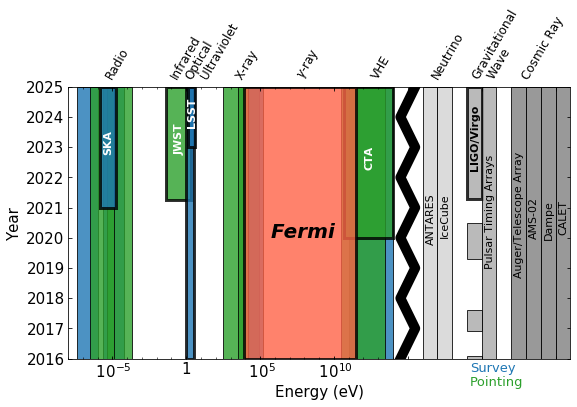

In [34]:
fig=plot.figure(figsize=(9, 5)) 
ax=plot.axes() 
for i in range(len(mm)): 
    weight='normal'
    linewidth=1
    if mm[i]['bold']==True: 
        weight='bold' 
        linewidth=3
    width=(np.log10(mm[i]['EnergyHigh'])-np.log10(mm[i]['EnergyLow'])) 
    m=np.log10(mm[i]['EnergyHigh'])-width/2. 
    plot.bar(m,mm[i]['ExtendedYear']-mm[i]['StartYear'],color=mm[i]['color'],width=width,bottom=mm[i]['StartYear'],alpha=0.8,\
                                                     edgecolor='black',linewidth=linewidth) 
    if mm[i]['Mission']!='Fermi': 

        plot.annotate(mm[i]['Mission'],(m-0.3,(mm[i]['ExtendedYear']-mm[i]['StartYear'])/2.+mm[i]['StartYear']+\
                                       float(len(mm[i]['Mission']))/10.),fontsize=mm[i]['fontsize'],\
                                      rotation=90,color=mm[i]['fontcolor'],weight=weight) 
#    if mm[i]['ExtendedYear']>mm[i]['StopYear']: 
#        plot.bar(m,mm[i]['ExtendedYear']-minyear,color=mm[i]['ecolor'],width=width,bottom=mm[i]['StopYear'],alpha=0.4,\
#                 edgecolor='black') 
    if mm[i]['Mission']=='Fermi': 
        plot.annotate(mm[i]['Mission'],(m-2,mm[i]['ExtendedYear']-5),fontsize=mm[i]['fontsize'],style='italic',\
                      weight='bold',color=mm[i]['fontcolor']) 
#         if mm[i]['ExtendedYear']>mm[i]['StopYear']: 
#             plot.annotate(mm[i]['Mission'],(m-2,mm[i]['ExtendedYear']-2.5),fontsize=mm[i]['fontsize'],\
#                           style='italic',weight='bold',color=mm[i]['fontcolor']) 
#             plot.annotate('Extended',(m-2.1,mm[i]['ExtendedYear']-3),fontsize=mm[i]['fontsize']-8,\
#                           color=mm[i]['fontcolor'])

x1=14.5 
x2=15.5 
x=np.array([x1,x2,x1,x2,x1,x2,x1,x2,x1,x2]) 
y=np.linspace(2016,2025,10) 
#print x,y 
plot.plot(x,y,color='black',linewidth=10)

l=np.array([r'Radio','Infrared','Optical','Ultraviolet','X-ray','$\gamma$-ray','VHE','Neutrino','Gravitational','Wave','Cosmic Ray'])
#leng=np.array([-6,-1,0,2,7,12,17,20,24])
leng=[0.07,0.2,0.23,0.26,0.33,0.45,0.6,0.72,0.8,0.83,0.9]
for i in range(len(l)):
    plot.annotate(l[i],(leng[i],1.02),rotation=60,xycoords='axes fraction',fontsize=12,verticalalignment='right')

plot.annotate('Survey',(0.8,-0.05),xycoords='axes fraction',fontsize=13,color=sc)
plot.annotate('Pointing',(0.8,-0.1),xycoords='axes fraction',fontsize=13,color=pc)
    
plot.rc('font',size=15) 
plot.xlim([-8,26]) 
plot.ylim([minyear,maxyear])

#plot.xscale('log') 
plot.ylabel('Year') 
plot.xlabel('Energy (eV)') 
plot.xticks(np.linspace(-5,25,7),[r' 10$^{-5}$ ','1',' 10$^{5}$ ',' 10$^{10}$ ','','','']) 
minor_ticks = np.arange(-8, 15, 1) 
ax.set_xticks(minor_ticks, minor = True) 
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True) 
plot.savefig(SRdir+'mw_mm.pdf',bbox_inches='tight') 
plot.show()

In [14]:
### PG1553
file=SRdir+'withheader_Tabulated_PG1553+113_45day_march2018_lc.txt'
pg1553=ascii.read(file)
d=ascii.read(SRdir+'pg1553_component_fit.txt')
f=ascii.read(SRdir+'4sinusoids_fit_lc45daybin_1v3_fp.txt')
print f

     col1             col2               col3      
------------- ------------------- -----------------
54705.1653124 1.5581344581207e-08 2.02478116109e-08
54750.1748501  1.522694868446e-08 1.58306515142e-08
54795.1529336 1.5458681118138e-08 1.98282715056e-08
54840.1504514 1.4557150163811e-08 1.44872336696e-08
54885.1567183 1.2688736923312e-08  1.1629759721e-08
54930.1470838  1.131916129645e-08 8.88785006748e-09
54975.1504514 1.0885265237718e-08 1.04418357047e-08
 55020.158715  1.070074911671e-08 1.17931134759e-08
55065.1481718 1.0752549843307e-08 9.04474622561e-09
55110.1504514 1.1812460106673e-08 1.02452592545e-08
          ...                 ...               ...
57675.1433145 1.4478326560513e-08  1.2739092715e-08
57720.1504514 1.5756516621489e-08 2.49974146371e-08
57765.1657677 1.8172633583093e-08 2.02254404861e-08
57810.1504514 1.9302343871824e-08 1.81923546169e-08
57855.1504514 1.7959249172409e-08 1.52172886614e-08
57900.1504514 1.5885431064228e-08 1.49960654704e-08
57945.143848

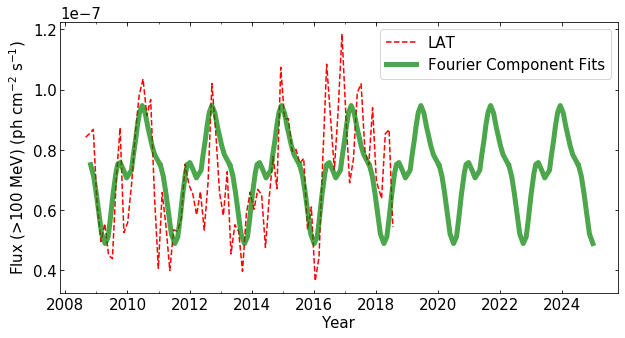

In [15]:
#print pg1553.keys()
plot.figure(figsize=(10,5))
ax=plot.axes()
#plot.errorbar(pg1553['yeardate'],pg1553['flux(X10^-8)']*1e-8,pg1553['dflux']*1e-8,color='red')#,marker='o',linestyle='None')
plot.plot(pg1553['yeardate'],pg1553['flux(X10^-8)']*1e-8,color='red',linestyle='--',label='LAT')
plot.rc('font',size=15)
#plot.yscale('log')
plot.xlabel('Year')
plot.ylabel(r'Flux (>100 MeV) (ph cm$^{-2}$ s$^{-1}$)')
minor_ticks = np.arange(2008, 2019, 1)
ax.set_xticks(minor_ticks, minor = True)

t2=Time(f['col1'],format='mjd',out_subfmt='date')
flux2=f['col2']
#print t
year2=[float(t2.yday[i][0:4])+float(t2.yday[i][5:8])/365. for i in range(len(f))]

flux0=d['flux']*1e-8
t=Time(d['mjd'],format='mjd',out_subfmt='date')
year0=[float(t.yday[i][0:4])+float(t.yday[i][5:8])/365. for i in range(len(d))]
year=[]
flux=[]
year=np.append(year0,year0+(np.max(year0)-np.min(year0)))
flux=np.append(flux0,flux0)
year=np.append(year,year0+2*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+3*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+4*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+5*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+6*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+7*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)

w=np.where(year <= 2025.)[0]
plot.plot(year[w],flux[w],linewidth=5,color='green',alpha=0.7,label='Fourier Component Fits')
#plot.plot(year2,flux2)
plot.legend()
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'pg1553.pdf',bbox_inches='tight')
plot.show()

In [16]:
### GI's as a function of time
gi=ascii.read('/Users/jracusin/Fermi/Senior_Review/general/Cy1-11PIs-CoIs.csv')

In [17]:
name=[str(gi['col2'][i])+str(gi['col3'][i]) for i in range(len(gi))]
name=name[1:]
prop=gi['col1'][1:]
#for i in range(len(prop)): print prop[i]
p=np.array([float(prop[i]) for i in range(len(prop))])
u,ind=np.unique(name,return_index=True)
#print name
print len(ind)
n=[len(np.where((p[ind]>i*10000.) & (p[ind]<(i+1)*10000.))[0]) for i in range(1,12)]

1796


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
1795
[35, 245, 242, 114, 191, 182, 153, 162, 212, 168, 91]
7668


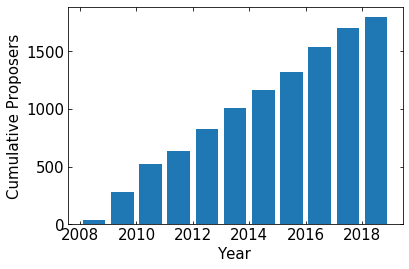

In [18]:
plot.figure()
ax=plot.axes()
print np.linspace(2008,2018,11)
print range(1,12)
print np.sum(n)
print n
print len(gi)
plot.bar(np.linspace(2008,2018,11)+0.5,np.cumsum(n))
plot.xlabel('Year')
plot.ylabel('Cumulative Proposers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'gis.pdf',bbox_inches='tight')
plot.show()

In [19]:
### phd theses
phds=ascii.read(SRdir+'Fermi_thesis_information_2019.csv')
years=np.array([float(phds['col4'][i]) for i in range(1,len(phds)-1)])

(array([  4.,  17.,  50.,  86., 114., 170., 201., 239., 277., 298., 345.]), array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019.]), <a list of 11 Patch objects>)


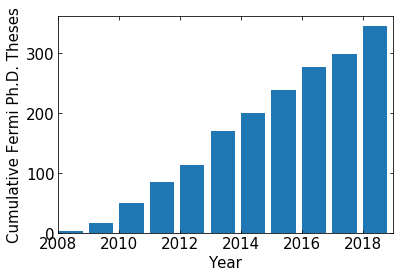

In [20]:
plot.figure()
ax=plot.axes()
w=np.where((years>=2008) & (years<=2019.))[0]
y=int(max(years[w])-min(years[w]))
h=plot.hist(years[w],y,width=0.8,cumulative=True)
#plot.bar(h[1][:-1]+0.5,h[0])
# print len(h[0])
#plot.bar(np.linspace(2008,2018,11)+0.5,np.cumsum(h[0]))
#plot.plot([2008.5,2008.5],[0,60],color='black',linestyle='--')
#plot.annotate('Launch',(2008.8,45))
print h
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
#ax.set_xticks(np.linspace(2008,2020,13),minor=True)
#plot.xticks(np.linspace(2008,2018,10))
plot.xlim(2008,2019)
#plot.ylim(0,60)
plot.xlabel('Year')
plot.ylabel('Cumulative Fermi Ph.D. Theses')
plot.savefig(SRdir+'phd_theses.pdf',bbox_inches='tight')
plot.show()

In [21]:
### Nova plot
lat=ascii.read(SRdir+'fermi_review_16ma_lat.dat')
opt=ascii.read(SRdir+'fermi_review_16ma_optical.dat')

In [22]:
# print lat
print opt
t_lat=mjd2year(lat['col1'])
t_opt=mjd2year(opt['col1'])
#print t_lat

    col1        col2   
----------- -----------
57686.02385 3.17298e-10
57687.02116 2.13534e-09
 57687.0575  1.7277e-09
 57687.4875 3.58958e-09
57688.02035 4.00351e-09
57688.44862 5.08941e-09
 57688.4889 4.38236e-09
57688.50153 5.26875e-09
57688.51133 5.16973e-09
 57688.9549 5.77707e-09
        ...         ...
57719.92708 6.06071e-09
57718.99587 7.56004e-09
57718.99598 7.88722e-09
57718.99607 8.01907e-09
57718.99617 7.99694e-09
57718.99627 7.62296e-09
57719.99668 7.70059e-09
57719.99678 7.67227e-09
57719.99688 8.17568e-09
57719.99698 7.23975e-09
57719.99708 6.73789e-09
Length = 155 rows


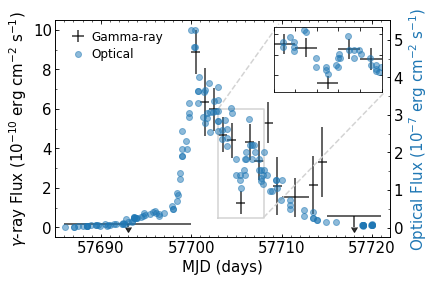

In [23]:
fig, ax1 = plot.subplots()
ax2 = ax1.twinx()
p1=ax2.plot(opt['col1'],opt['col2']/1e-7,marker='o',linestyle='None',alpha=0.5,label='Optical')

wdet=np.where(lat['col3'] > -1)[0]
wul=np.where(lat['col3'] == -1)[0]
#p2=ax1.plot(lat['col1'][wdet],lat['col2'][wdet]/1e-10,color='black',marker='+',label=r'$\gamma$ ray',linestyle='None',alpha=0.8)
ax1.errorbar(lat['col1'][wdet],lat['col2'][wdet]/1e-10,xerr=lat['col4'][wdet],yerr=lat['col3'][wdet]/1e-10,\
             linestyle='None',color='black',label='Gamma-ray',alpha=0.8,marker='None')
ax1.errorbar(lat['col1'][wul],lat['col2'][wul]/1e-10,xerr=lat['col4'][wul],yerr=lat['col2'][wul]/1e-10,\
             linestyle='None',uplims=True,color='black',label=None,alpha=0.8)

#ax3.set_xscale([57703.5,57707.5])

#plot.legend()
ax1.set_xlabel('MJD (days)')
ax1.set_ylabel(r'$\gamma$-ray Flux (10$^{-10}$ erg cm$^{-2}$ s$^{-1}$)')
ax2.set_ylabel(r'Optical Flux (10$^{-7}$ erg cm$^{-2}$ s$^{-1}$)',color='C0')
ax1.tick_params(direction='in',axis='both',which='both',right=False,top=True)
ax2.tick_params(direction='in',axis='both',which='both',right=True,top=True)

#plot.legend((ax1,ax2),('Optical',r'$\gamma$ ray'),loc=2)
#plot.legend(loc=2)
# lns = p1+p2
# labs = [l.get_label() for l in lns]
# plot.legend(lns, labs, loc=2)

#plot.rc('xtick', labelsize=10)
#plot.rc('ytick', labelsize=10)
ax3=fig.add_axes([0.63,0.63,0.25,0.225])
w3=np.where((opt['col1']>=57703) & (opt['col1']<=57708))[0]
ax3.plot(opt['col1'][w3]-57703,opt['col2'][w3]/1e-7,marker='o',linestyle='None',alpha=0.5,label='Optical')
w3l=np.where((lat['col1']>=57703) & (lat['col1']<=57708))[0]
ax3.errorbar(lat['col1'][w3l]-57703,lat['col2'][w3l]/1e-10*5.3/10.,xerr=lat['col4'][w3l],yerr=lat['col3'][w3l]/1e-10*5.3/10.,\
             linestyle='None',color='black',label='Gamma-ray',alpha=0.8)
ax3.set_xlim([0,5])
ax3.set_xticks(np.linspace(0,5,6))#[57704,57705,57706,57707])
ax3.tick_params(labelleft=False)
ax3.tick_params(labelbottom=False)
ax3.tick_params(direction='in',axis='both',which='both',right=True,top=True)

ax1.plot([57703,57708,57708,57703,57703],[0.5,0.5,6,6,0.5],color='lightgrey')
ax1.plot([57703,57709.7],[6,10.3],color='lightgrey',linestyle='--')
ax1.plot([57708,57721.3],[0.5,6.8],color='lightgrey',linestyle='--')
minor_ticks = np.linspace(57685,57722,38)
ax1.set_xticks(minor_ticks, minor = True)
ax1.set_xticks(np.linspace(57690,57720,4))
ax1.set_ylim([-0.5,10.5])
ax1.set_xlim([57685,57722])

ax1.set_yticks(np.linspace(0,10,11),minor=True)
ax2.set_yticks(np.linspace(0,5,11),minor=True)
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')

ax1.legend(loc='upper left',fontsize=12,frameon=False,handletextpad=0.1)
ax2.legend(loc='upper left',fontsize=12,bbox_to_anchor=(0., 0., 0.5, 0.92),frameon=False,handletextpad=0.1)
#plot.rc('xtick', labelsize=14)
plot.savefig(SRdir+'nova_lat_optical.pdf',bbox_inches='tight')
plot.show()

In [24]:
print np.linspace(2016,2025,10)

[2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025.]


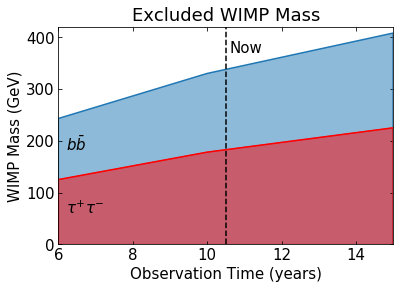

In [25]:
### WIMP LIMIT plot
bb_x=[6,6,10,15,15]
bb_y=[0,243,330,408,0]

tt_x=[6,6,10,15,15]
tt_y=[0,125,178,225,0]

plot.figure()
ax=plot.axes()
plot.fill(bb_x,bb_y,alpha=0.5)
plot.fill(tt_x,tt_y,color='red',alpha=0.5)
plot.plot(bb_x,bb_y,color='C0')
plot.plot(tt_x,tt_y,color='red')
plot.plot([10.5,10.5],[0,420],linestyle='--',color='black')
plot.annotate('Now',xy=(10.6,370))
#plot.annotate('Excluded WIMP Mass',xy=(8,240))
plot.title('Excluded WIMP Mass')
#plot.legend()
plot.annotate(r'$\tau^{+}\tau^{-}$',xy=(6.2,60))
plot.annotate(r'$b\bar{b}$',xy=(6.2,180))
plot.ylabel('WIMP Mass (GeV)')
plot.xlabel('Observation Time (years)')
plot.xlim([6,15])
plot.ylim([0,420])
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'WIMPlimit_vs_time_v2.pdf',bbox_inches='tight')
plot.show()

In [26]:
bb15y=ascii.read(SRdir+'LAT_dsphs_15y_45dsph_bb.txt')
bb10y=ascii.read(SRdir+'limits_bb.txt')
mass = np.array([1.00e-01, 1.78e-01, 3.16e-01, 5.62e-01, 1.00e+00, 1.78e+00,\
        3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,\
        1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,\
        3.16e+03, 5.62e+03, 1.00e+04, 5.00e+04])
sigmav = np.array([4.8, 4.9, 5.1, 5.0, 4.7, 4.5, 3.9, 2.8, 2.5,\
          2.3, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3,\
          2.3, 2.3, 2.4, 2.4])*1e-26
m1=[6, 10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000]
#s1=[5.2418e-27, 5.18e-27, 8.284e-27, 1.3061e-26, 2.1326e-26, 4.5579e-26,8.9707e-26, 1.8736e-25, 5.6658e-25, 1.4274e-24, 3.86e-24]
s1=[5.1264e-27, 5.1678e-27, 8.4463e-27, 1.3481e-26, 2.2099e-26, 4.7266e-26,9.2818e-26, 1.9317e-25, 5.8134e-25, 1.4604e-24, 3.9412e-24]
SRdir16='/Users/jracusin/Fermi/Senior_Review/SR2016/DM_wp/data/dm_limits/'
daylan=ascii.read(SRdir16+'daylan2014_v2_bb_2s')
gordon=ascii.read(SRdir16+'gordon2013_bb_2s')
calore=ascii.read(SRdir+'calore2014_bb_2s.txt')

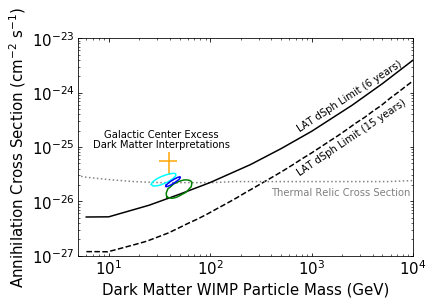

In [27]:
plot.figure()
ax=plot.axes()
#plot.plot(bb10y['col1'],bb10y['col47'],color='black')
plot.plot(bb15y['x'],bb15y['y'],color='black',linestyle='--')
plot.plot(mass,sigmav,color='grey',linestyle=':')
plot.plot(m1,s1,color='black')

plot.errorbar(39.4,5.5e-26,xerr=7.9,yerr=2.4e-26,color='orange')
plot.plot(calore['x'],calore['y'],color='green')
plot.plot(gordon['x'],gordon['y'],color='cyan')
plot.plot(daylan['x'],daylan['y'],color='blue')

#plot.arrow(10,6e-27,0.1,1e-27)

plot.annotate('Galactic Center Excess',xy=(9,1.5e-25),fontsize=10)
plot.annotate('Dark Matter Interpretations',xy=(7,1e-25),fontsize=10)
plot.annotate('LAT dSph Limit (6 years)',xy=(700,3e-24),rotation=33,fontsize=10)
plot.annotate('LAT dSph Limit (15 years)',xy=(700,6e-25),rotation=34,fontsize=10)

plot.annotate('Thermal Relic Cross Section',xy=(400,1.3e-26),color='grey',fontsize=10)
plot.xlim([5,1e4])
plot.ylim([1e-27,1e-23])
plot.xscale('log')
plot.yscale('log')
plot.ylabel(r'Annihilation Cross Section (cm$^{-2}$ s$^{-1}$)')
plot.xlabel('Dark Matter WIMP Particle Mass (GeV)')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'DM_limits.pdf',bbox_inches='tight')